### Import Library

In [1]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz

### Input File

In [2]:
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

df

Saving 9.csv to 9.csv


,0,2287,2948,2189,1
0,1.0,2249,2677,2046,1
1,2.0,2270,2568,2005,1
2,3.0,2222,2565,2003,1
3,4.0,2235,2571,2074,1
4,5.0,2205,2559,2075,1
...,...,...,...,...,...
166735,166740.0,2072,2545,2059,7
166736,166740.0,2069,2547,2064,7
166737,166740.0,2069,2542,2062,7
166738,166740.0,2069,2543,2063,7


### Pembuatan Data

In [3]:
# Memasukkan dataset yg diupload ke masing-masing variabel A, B, C, D

A = df.iloc[:, 0] # Index
B = df.iloc[:, 1] # Sumbu X
C = df.iloc[:, 2] # Sumbu Y
D = df.iloc[:, 3] # Sumbu Z

#karena record datanya banyak, maka diambil 1500 datanya saja
B_Data = B[1 : 1500]
C_Data = C[1 : 1500]
D_Data = D[1 : 1500]

## MVA FILTER

In [4]:
# Function untuk filter
def Filter_MVA(data, window_size):
  result = data.rolling(window=window_size).mean()
  return result

### Filter Kolom C, Window Size 50

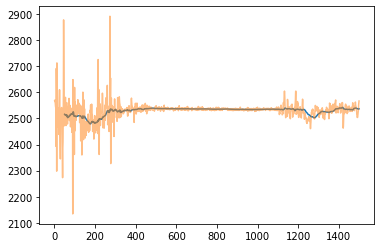

In [5]:
Filter_MVA(C_Data, 50).plot(label ='MVA')
plt.plot(C_Data, label='Kolom C', alpha = 0.5)
MVA_C = Filter_MVA(C_Data, 50)

### Filter Kolom C, Window Size 25

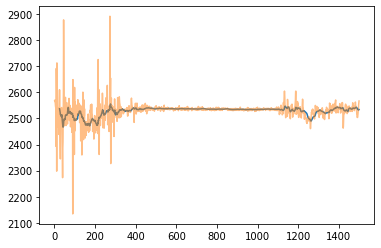

In [11]:
Filter_MVA(C_Data, 25).plot(label ='MVA')
plt.plot(C_Data, label='Kolom C', alpha = 0.5)
MVA_C = Filter_MVA(C_Data, 25)

### Filter Kolom C, Window Size 10

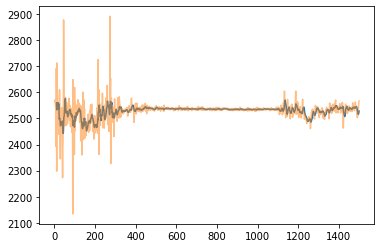

In [10]:
Filter_MVA(C_Data, 10).plot(label ='MVA')
plt.plot(C_Data, label='Kolom C', alpha = 0.5)
MVA_C = Filter_MVA(C_Data, 10)

## LPF Filter

In [31]:
def ButterLowpass(cutoff, fs, order=5):
  nyq = fs*0.5
  NormalCutoff = cutoff / nyq
  b, a = butter(order, NormalCutoff, btype='low', analog=False)
  return b,a

def ButterLowpassFilter(data, cutoff, fs, order=5):
  b, a = ButterLowpass(cutoff, fs, order=order)
  y = lfilter(b, a, data)
  return y

# Kebutuhan Filter
order = 6
fs = 30.0  # rate sampel per data
cutoff = 3.667 # cutoff frequency yang diharapkan dari filter

# Koefisien Filter
b, a = ButterLowpass(cutoff, fs, order)

### Filter Kolom C

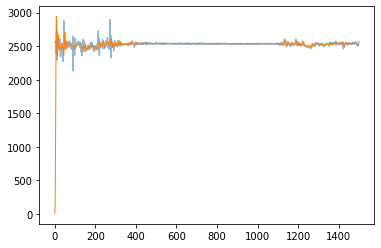

In [32]:
y = ButterLowpassFilter(C_Data, cutoff, fs, order)
plt.plot(C_Data, label='C', alpha = 0.5)
plt.plot(y, linewidth=1, label='Filtered Fata')